# Opdracht: Meervoudige regressie

    TW2

    MVS: week 3 Meervoudige regressie.
    Opdracht: woningen.

    Reference:
    [2] Arie Buijs (2012). "Statistiek om mee te werken". 13.4 Meervoudige regressie

    # 1. Importeer het bestand woningen.csv in R.
    # 2. Beantwoord de volgende vragen m.b.v. R:
    # a. Verklaar de vraagprijs van een huis uit het aantal kamers.
    # b. Verklaar de vraagprijs van een huis uit de perceeloppervlakte.
    # c. Onderzoek met meervoudige regressie hoe men de vraagprijs kan verklaren uit de verschillende beschikbare variabelen.
    # d. Bepaal de correlatiematrix
    # e. Bepaal de regressievergelijking waarin alle verklarende variabelen opgenomen zijn
    # f. Bereken voor het onder e berekende model de onverklaarde, verklaarde en totale variantie
    # g. Bereken voor het onder e berekende model de determinatiecoëfficiënt
    # h. Welk model met slechts één verklarende variabele vind je het beste?
    # i. Onderzoek of toevoeging van andere variabelen aan het onder h gevonden model statistisch gezien zinvol is.
    # 3. Voorzie je codes van voldoende commentaar om begrijpelijk te zijn voor medestudenten.
    # 4. Beantwoord de vragen kort en bondig in je R-code. 

Eerst lezen we data in:

In [3]:
df = read.csv('woningen.csv')
n = nrow(df)

In [4]:
head(df)

nr,wijk,kamers,badkamers,grond,bouwjaar,garage,c.v.,prijs
1,1,3,0,120,1920,0,0,132000
2,1,4,0,140,1932,0,0,137500
3,3,4,0,110,1938,0,1,138000
4,1,3,1,110,1927,0,0,139500
5,1,3,0,140,1968,0,1,142000
6,1,3,0,220,1935,0,0,144000


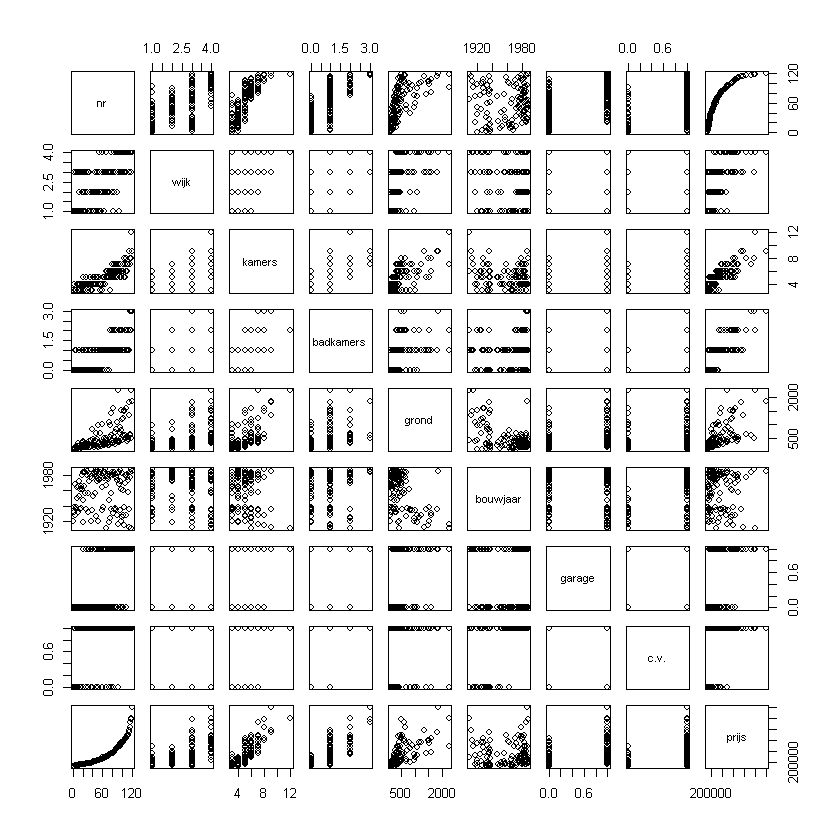

In [5]:
plot(df)

In [6]:
cor(df)

,nr,wijk,kamers,badkamers,grond,bouwjaar,garage,c.v.,prijs
nr,1.00000000,0.6522696,0.8023127,0.7171001,0.61792390,0.030588024,0.566255593,0.38431212,0.90293125
wijk,0.65226958,1.0000000,0.5772251,0.5622976,0.50676509,-0.131593664,0.336622096,0.23701880,0.62805325
kamers,0.80231267,0.5772251,1.0000000,0.6102381,0.65039295,-0.138600738,0.480954784,0.24707433,0.84772476
badkamers,0.71710014,0.5622976,0.6102381,1.0000000,0.36789622,0.146956629,0.396418896,0.34273990,0.74766016
grond,0.61792390,0.5067651,0.6503929,0.3678962,1.00000000,-0.514937807,0.380499270,-0.07040921,0.63921682
bouwjaar,0.03058802,-0.1315937,-0.1386007,0.1469566,-0.51493781,1.000000000,-0.008594062,0.60374084,-0.01366355
garage,0.56625559,0.3366221,0.4809548,0.3964189,0.38049927,-0.008594062,1.000000000,0.11725441,0.53154923
c.v.,0.38431212,0.2370188,0.2470743,0.3427399,-0.07040921,0.603740844,0.117254412,1.00000000,0.31274553
prijs,0.90293125,0.6280533,0.8477248,0.7476602,0.63921682,-0.013663546,0.531549226,0.31274553,1.00000000


# Onderzoekvragen

## Verklaar de vraagprijs van een huis uit het aantal kamers

In [17]:
fit = lm(df$prijs~df$kamers)
summary(fit)


Call:
lm(formula = df$prijs ~ df$kamers)

Residuals:
    Min      1Q  Median      3Q     Max 
-202683  -75163  -18632   54434  394522 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -219601      34447  -6.375 3.69e-09 ***
df$kamers     113898       6561  17.361  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 115100 on 118 degrees of freedom
Multiple R-squared:  0.7186,	Adjusted R-squared:  0.7163 
F-statistic: 301.4 on 1 and 118 DF,  p-value: < 2.2e-16


In [20]:
se2 = sum(fit$residuals^2) / (n-2)
SST = sum((df$kamers - mean(df$kamers))^2)
kamers = 1:13
su = sqrt(se2) * sqrt(1 + 1/n + (kamers - mean(df$kamers))^2 / SST)
alpha = 0.05
t = abs(qt(alpha/2, n-2))
Yc = fit$coefficients[2] * kamers + fit$coefficients[1]
interval.top = Yc + t * su
interval.bottom = Yc - t * su

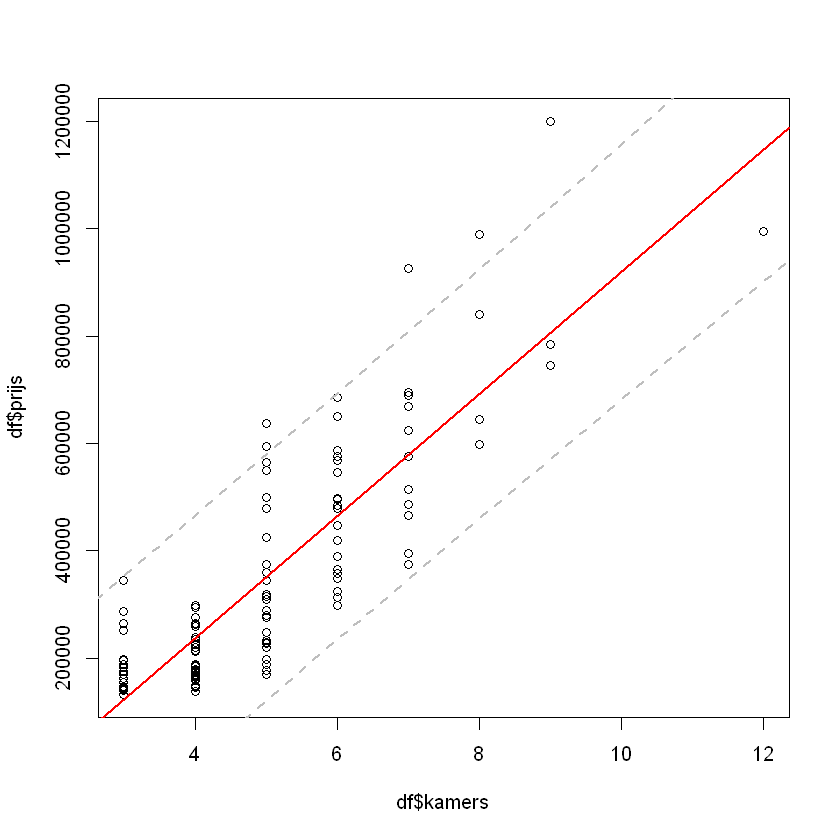

In [21]:
plot(df$kamers, df$prijs)
lines(interval.top, lty='dashed', lw=2, col='gray')
lines(interval.bottom, lty='dashed', lw=2, col='gray')
abline(fit, col='red', lw=2)

In [32]:
data.frame(kamers, interval.bottom, Yc, interval.top)

kamers,interval.bottom,Yc,interval.top
1,-340484.602,-105703.409,129077.8
2,-224056.961,8194.318,240445.6
3,-108335.147,122092.045,352519.2
4,6663.997,235989.773,465315.5
5,120930.040,349887.500,578845.0
6,234459.451,463785.227,693111.0
7,347255.762,577682.955,808110.1
8,459329.403,691580.682,923832.0
9,570697.216,805478.409,1040259.6
10,681381.711,919376.136,1157370.6


## Verklaar de vraagprijs van een huis uit de parceeloppervlakte

In [33]:
fit = lm(df$prijs~df$grond)
summary(fit)


Call:
lm(formula = df$prijs ~ df$grond)

Residuals:
    Min      1Q  Median      3Q     Max 
-388150  -95009  -44460   43989  646031 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 192202.41   23177.69   8.293 2.04e-13 ***
df$grond       303.53      33.62   9.029 3.94e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 166900 on 118 degrees of freedom
Multiple R-squared:  0.4086,	Adjusted R-squared:  0.4036 
F-statistic: 81.53 on 1 and 118 DF,  p-value: 3.939e-15


In [40]:
se2 = sum(fit$residuals^2) / (n-2)
SST = sum((df$grond - mean(df$grond))^2)
su = sqrt(se2) * sqrt(1 + 1/n + (order(df$grond) - mean(df$grond))^2 / SST)
alpha = 0.05
t = abs(qt(alpha/2, n-2))
Yc = fit$coefficients[2] * order(df$grond) + fit$coefficients[1]
interval.top = Yc + t * su
interval.bottom = Yc - t * su

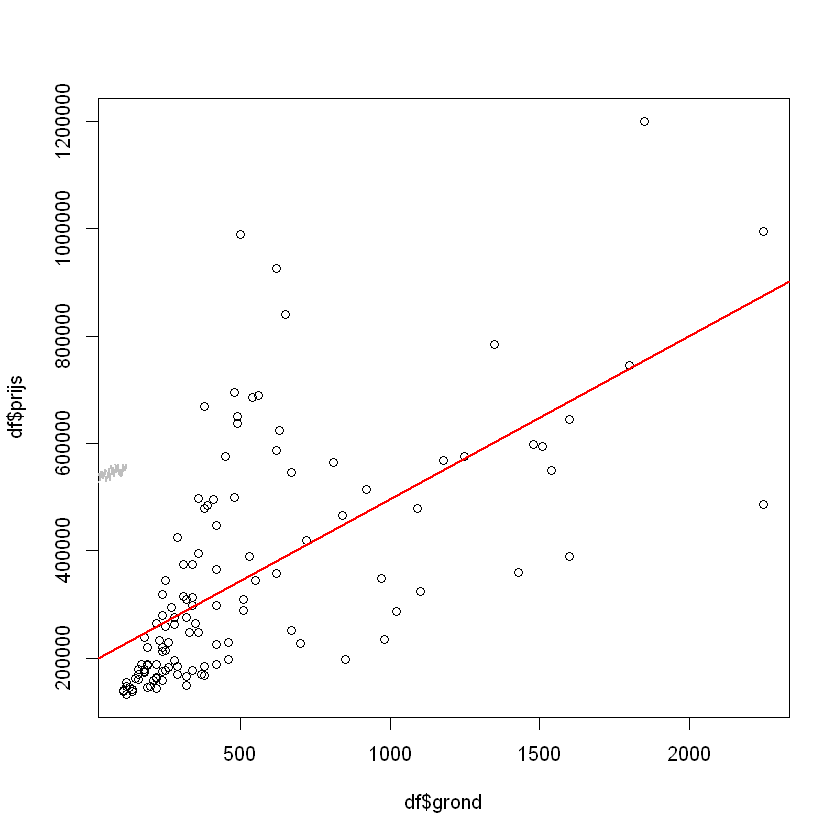

In [41]:
plot(df$grond, df$prijs)
abline(fit, col='red', lw=2)
lines(interval.top, lty='dashed', lw=2, col='gray')
lines(interval.bottom, lty='dashed', lw=2, col='gray')
abline(fit, col='red', lw=2)

# Onderzoek met meervoudige regressie hoe men de vraagprijs kan verklaren uit de verschillende beschikbare variabelen.

In [28]:
tail(cor(df), 1)

,nr,wijk,kamers,badkamers,grond,bouwjaar,garage,c.v.,prijs
prijs,0.9029312,0.6280533,0.8477248,0.7476602,0.6392168,-0.01366355,0.5315492,0.3127455,1
